# **Conformal Geoemtric Algebra - Plotting Elements**

In this notebook we focus on plotting some of the elements we've created in the previous notebooks.

In [1]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

# using Plots
# plotly();
using PlotlyJS
include("./auxiliary.jl")

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


WebIO._IJuliaInit()

inversion

## 1. Plotting Points

Let's start by plotting points as single objects.

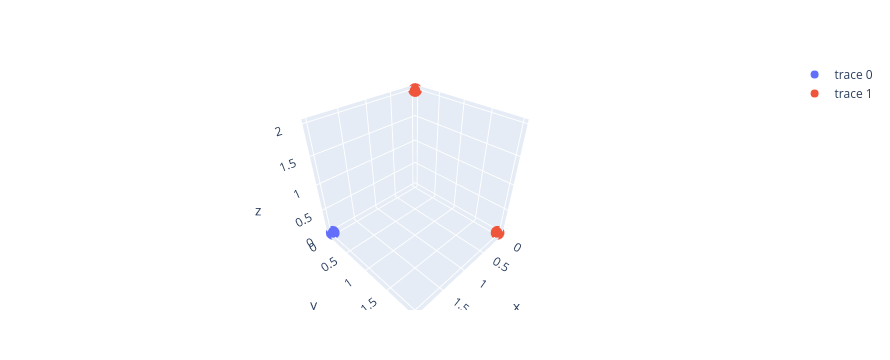

In [2]:
function plotpoint(pts::Vector;
        mode="markers",
        plottype="scatter3d",
        kwargs...)
    
    x = [i.e1 for i in pts]
    y = [i.e2 for i in pts]
    z = [i.e3 for i in pts]
    
    scatter(x=x,y=y,z=z,mode=mode,type=plottype;kwargs...) 
end

function plotpoint(p::MultiVector; plottype="scatter3d", kwargs...)
    plotpoint([p];plottype=plottype, kwargs...)
end

a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
plot(
    [
        plotpoint(a),
        plotpoint([b,c])
    ]
)

## 2. Plotting Point Pairs

Remember that a point pair is can be represented as a multivector $p \wedge q$.
We use the empty circle marker in order to represent it differently

In [3]:
function plotpointpair(p_q::MultiVector;
        marker=attr(symbol="circle-open"),
        plottype="scatter3d", kwargs...)
    
    T = p_q
    G = T/√scalar(T^2)
    Prj = (1+G)/2
    p = Prj * ((T) ⋅ n∞) * reverse(Prj)
    q = -reverse(Prj) * ((T) ⋅ n∞) * Prj
    plotpoint([p,q]; plottype = plottype, marker = marker, kwargs...)
end

plotpointpair (generic function with 1 method)

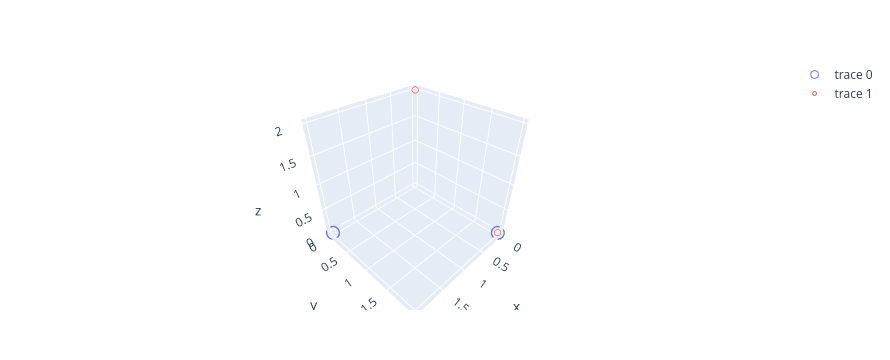

In [4]:
plot([
        plotpointpair(a∧b),
        plotpointpair(b∧c,
                      marker=(attr(
                                    size=4,
                                    symbol="circle-open"
                )
            )
        )
    ]
)

## 3. Plotting Lines

In 3D space, our flats are either lines or planes.

A line can easily be represented by $p \wedge q \wedge n_\infty$, or
$p \wedge \mathbf v \wedge n_\infty$.



In [5]:
line(p::MultiVector, q::MultiVector) = p ∧ q ∧ n∞

function line(v::Vector, p::MultiVector=point(0,0,0))
    return p ∧ multivector(v) ∧ n∞
end

line (generic function with 3 methods)

In [6]:
p = point(0,1,0)
q = point(2,3,0)

v = [1,1]


l = line(p,q)
# the difference here will be on the line weight
l = line(v,p)

-1.0×e1e₊e2-1.0×e1e2e₋-1.0×e1e₊e₋+1.0×e2e₋e₊ ∈ Cl(4, 1, 0)

In [7]:
function plotline(l::MultiVector,
        linelengthfactor=1;
        mode="lines",
        plottype="scatter3d",
        kwargs...)
    
    weight = norm(n∞ ⨼ (no ⨼ l))
    v = n∞ ⨼ (no ⨼ l)/weight
    d = getblades((no ⨼ l) / l)
    
    lstart = linelengthfactor*v + d
    lend   = -linelengthfactor*v + d
    
    x = [i.e1 for i in [lstart,lend]]
    y = [i.e2 for i in [lstart,lend]]
    z = [i.e3 for i in [lstart,lend]]
    
    scatter(x=x,y=y,z=z,mode=mode,type=plottype;kwargs...) 
end


plotline (generic function with 2 methods)

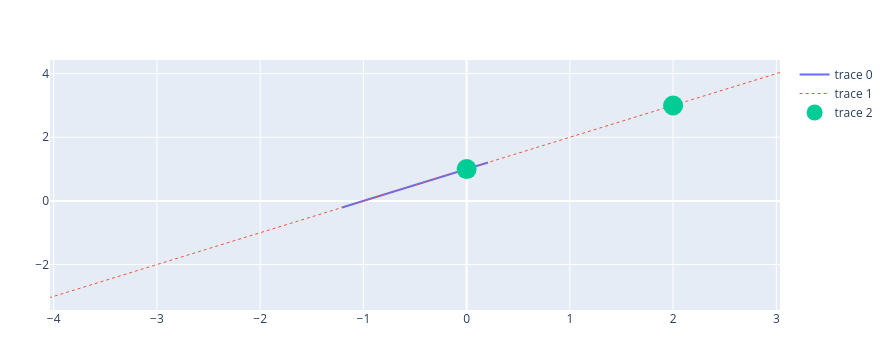

In [8]:
p1 = plotline(l,plottype="scatter")

l2 = line(p,q)

p2 = plotline(l2,5,plottype="scatter",line=attr(width=1, dash="dot"))

p3 = plotpoint([p,q],plottype="scatter",marker=attr(size=20))
plot([p1,p2,p3])

## 4. Plotting Planes

Remember that dual planes are represented by

$$
\mathbf n + \delta n_\infty,
$$
where $\mathbf n$ is the vector normal to the plane and $\delta$ is the distance
from the origin. The direct plane can be obtained via dualization, or we can construct it as:

$$
a \wedge b \wedge c \wedge n_\infty.
$$

In order to plot the plane, we need at least three points on it. We can obtain these points
by projecting them in the plane. The only thing we need is to guarantee that the
points do not fall all in a single line. We can guarantee this in different ways,
one way is to use the canonical vectors, i.e. $\mathbf e_1, \mathbf e_2, \mathbf e_3$
and the respective negative versions.

We also use the support point as reference to where to draw the plane. Note,
the plane has infinite extension, but we draw just a part of it. Which portion
we want to draw depends on our use case. As default, we use the support point
and add the base vectors in order to get 6 different points. We then project these
points in the plane and draw.

In [9]:
plane(a::MultiVector,b::MultiVector,c::MultiVector) = a ∧ b ∧ c ∧ n∞
plane(n::MultiVector,δ::Union{Real,MultiVector}) = cdual(n + δ*n∞)
function plane(n::Vector,δ::Real)
    n = n/norm(n)
    n = multivector(n)
    return plane(n, δ)
end

p = point(0,1,0)
q = point(2,3,0)
r = point(1,1,1)

Π = plane(p,q,r);

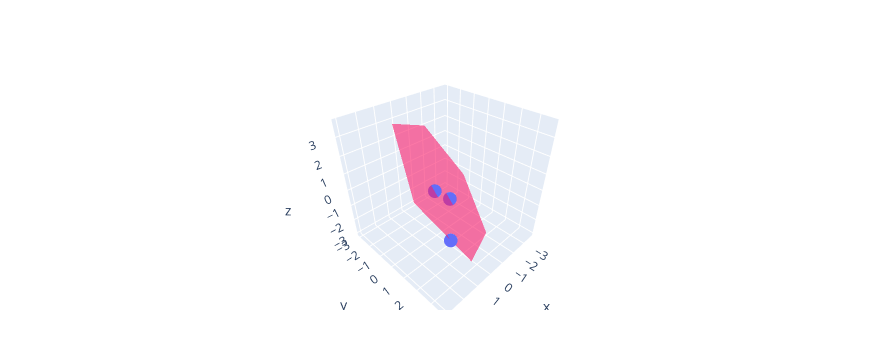

In [10]:
function plotplane(Π::MultiVector,
        planelengthfactor=1;
        color="rgba(244,22,100,0.6)",
        kwargs...)
    
    weight = norm(n∞ ⨼ (no ⨼ Π))
    A = n∞ ⨼ (no ⨼ Π)/weight
    n = edual(A)

    d_vec = getblades((no ⨼ Π) / Π)
    d = F(d_vec)

    δ = norm(d_vec)
    pts = [
        translate(d, planelengthfactor* point(1,0,0)),
        translate(d, planelengthfactor* point(0,1,0)),
        translate(d, planelengthfactor* point(0,0,1)),
        translate(d, planelengthfactor* point(-1,0,0)),
        translate(d, planelengthfactor* point(0,-1,0)),
        translate(d, planelengthfactor* point(0,0,-1)),
    ]
    
    # Project points into plane Π
    pts = [(p ⨼ Π)/Π for p in pts]
    
    x = [i.e1 for i in pts]
    y = [i.e2 for i in pts]
    z = [i.e3 for i in pts]
    
    mesh3d(x=x,y=y,z=z;color=color, kwargs...)
end

m = plotplane(Π, 5)

s = plotpoint([p,q,r])

plot([s,m])

## 5. Plotting Circles

This is perhaps the most dificult to plot.
First, from a circle element $C$, compute the radius and the center. Next,
we need to extract the flat that supports it, also known as *carrier*, which we'll call $E$.

Remember that a flat is $E = p \wedge \mathbf A \wedge n_\infty$, where $p$ is a point in the flat,
$\mathbf A$ is the "direction" blade (which can be obtained as the Euclidean dual of a normal vector).
We normalize this blade $\mathbf A$, as it'll be used in the rotation rotor.
Then, we apply a translation of $\mathbf c$ to $\mathbf A$, where $\mathbf c$ is Euclidean coordinates of the center point $c$ of the circle element $C$.
Thus, we construct our rotor as $R = \exp(- A \phi /2)$, which can be used to do rotations of angle $\phi$
around point $c$ and in the direction of the circle $C$.

Now, we only need one point $x_p$ that is *in* the circle $C$, i.e. $x \wedge C = 0$. With this point,
we can apply the rotor $R$ to rotate it along the circle and thus obtaining more points.

To obtain a point in the circle we can simply do a projection of an arbitrary point $x$ in $E$.
The problem with this approach is that if our point is in the axis perpendicular to $E$
and passing thorugh the center $c$, then our projection will be exactly the center of the
circle. To avoid this we do the following, first, we use the direction blade $A$
and apply the Euclidean dual to get the normal vector $\mathbf n$.

We start by contructing a tangent vector $t = c \wedge (c \rfloor (u \wedge n_\infty))$,
where $\mathbf u = \mathbf n + \mathbf e_1$.
Then, we project the vector into $E$.
Note that the reason for $\mathbf u = \mathbf n + \mathbf e_1$ is that with this we guarantee that
the projected vector is not null.
We normalize the resulting vector and multiply it by the radius of the circle. Hence,
the final vector is pointing to the circle.

We can use the center of the circle and the vector direction to get a point $x$ in the circle.
Lastly, we apply $R$ using a set of angles from 0 to $\pi$. With this, we have a full collection of points in
the circle.

In [11]:
p = point(1,1,-1)
q = point(3,1,1)
r = point(2,0,1)

C = p ∧ q ∧ r

E = C ∧ n∞ # Carrier
c = -(1/2)*(C * n∞ * C)/((n∞ ⨼ C)^2)
ρ = √scalar(C*grin(C)/(n∞ ⨼ C)^2)

1.4142135623730951

In [12]:
weight = norm(n∞ ⨼ (no ⨼ E))
A = n∞ ⨼ (no ⨼ E)/weight
n = edual(A)

# Our `translate` function applies the `getblades` function to point `c`
# in order to get only the Euclidean coordinates for translation
A = translate(A, c)

+0.5773502691896258×e1e2-0.5773502691896258×e1e3-0.577350269189626×e2e3-0.5773502691896258×e1e₊+1.1547005383792517×e2e₊-1.7320508075688776×e3e₊+0.5773502691896258×e1e₋-1.1547005383792517×e2e₋+1.7320508075688776×e3e₋ ∈ Cl(4, 1, 0)

t / (-n∞ ⨼ t) == c = false
getblades(-(n∞ ⨼ t)) == u = false
t / (-n∞ ⨼ t) ≈ c = true
u = getblades(-(n∞ ⨼ t)) = +0.6666666666666667×e1+0.33333333333333315×e2+0.33333333333333304×e3 ∈ Cl(4, 1, 0)


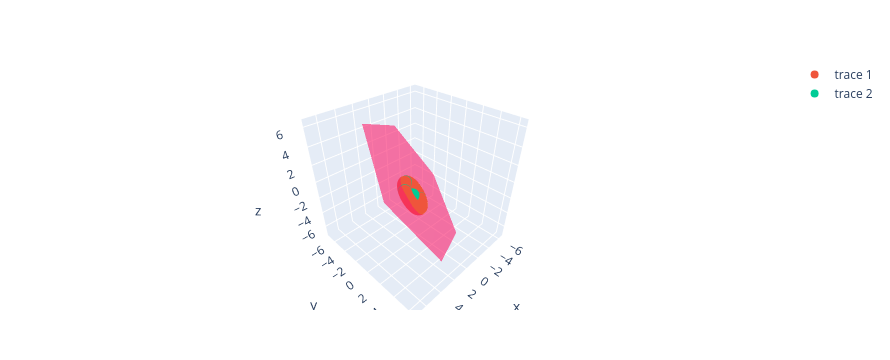

In [13]:
u = n + cl.e1
t = c ∧ ( c ⨼ ( u ∧ n∞)) # Tangent vector translated to c 

@show t / (-n∞ ⨼ t) == c
@show getblades(-(n∞ ⨼ t)) == u;

t = (t ⨼ E) / E
@show t / (-n∞ ⨼ t) ≈ c
@show u = getblades(-(n∞ ⨼ t));

ϕs = 0:0.1:2π
tp = F(ρ* u/norm(u) + getblades(c))
ts = []
push!(ts,tp)
for ϕ in ϕs
    R  = exp(-A*ϕ/2)
    tr = R*tp*reverse(R)
    push!(ts,tr)
end

p1 = plotpoint(ts)

X = c
p2 = plotpoint([p,q,r,X])
m   = plotplane(E,10)

plot([m,p1,p2])

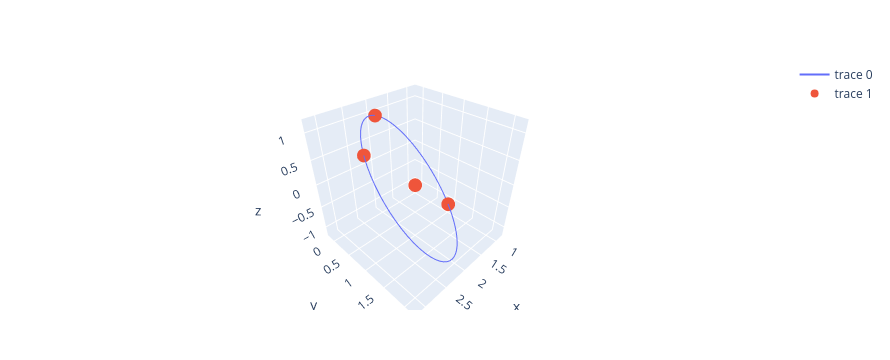

In [16]:
function plotcircle(C::MultiVector)
    E = C ∧ n∞ # Carrier
    c = -(1/2)*(C * n∞ * C)/((n∞ ⨼ C)^2) # center
    ρ = √scalar(C*grin(C)/(n∞ ⨼ C)^2) # radius
    
    weight = norm(n∞ ⨼ (no ⨼ E))
    A = n∞ ⨼ (no ⨼ E)/weight
    n = edual(A)
    A = translate(A, c)
    
    u = n + cl.e1
    t = c ∧ ( c ⨼ ( u ∧ n∞)) # Tangent vector translated to c 
    t = (t ⨼ E) / E
    u = getblades(-(n∞ ⨼ t))

    ϕs = 0:0.1:2π
    ϕs = vcat(ϕs,0)
    tp = F(ρ* u/norm(u) + getblades(c))
    ts = []
    push!(ts,tp)
    for ϕ in ϕs
        R  = exp(-A*ϕ/2)
        tr = R*tp*reverse(R)
        push!(ts,tr)
    end
    plotpoint(ts, mode="lines")
end

p1 = plotcircle(C)
p2 = plotpoint([p,q,r,c])

plot([p1,p2])

## 4. Plotting Sphere

First, let's write some auxiliary functions to create a unit normal sphere and to plot it.

In [17]:
function sphere(ρ::Real=1.0, c::MultiVector=point(0,0,0))
    cdual(c - ρ^2 * n∞ /2)
end
function sphere(ρ::Real, c::Vector)
    cdual(point(c...) - ρ^2 * n∞ /2)
end
function sphere(a::MultiVector,b::MultiVector,c::MultiVector,d::MultiVector)
    a ∧ b ∧ c ∧ d
end

function generatespherepoints(Σ)
    ρ = √scalar((Σ * grin(Σ))/((n∞ ⨼ Σ)^2));
    c = -(1/2)*(Σ * n∞ * Σ)/((n∞ ⨼ Σ)^2)
    
    n = 100
    u = range(-π, π; length = n)
    v = range(0, π; length = n)
    x = ρ.*cos.(u) * sin.(v)' .+ c.e1
    y = ρ.*sin.(u) * sin.(v)' .+ c.e2
    z = ρ.*ones(n) * cos.(v)' .+ c.e3
    return x,y,z
end

function plotsphere(Σ::MultiVector;showscale=false,kwargs...)
    x,y,z = generatespherepoints(Σ)
    surface(x=x, y=y, z=z;showscale=showscale, kwargs...)
end

plotsphere (generic function with 1 method)

In [18]:
p1 = plotsphere(sphere(0.8,point(1,0,1)),opacity=0.5)
p2 = plotsphere(sphere(),opacity=0.5,colorscale=[[0, "rgb(244,22,100,0.6)"], [1, "rgb(244,22,100,0.6)"]])

plot([p1,p2])

data: [
  "surface with fields opacity, showscale, type, x, y, and z",
  "surface with fields colorscale, opacity, showscale, type, x, y, and z"
]

layout: "layout with fields margin and template"

In [19]:
a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
d = point(-2,0,0)

Σ =sphere(a,b,c,d)

s = plotsphere(Σ, opacity=0.5,colorscale=[[0, "rgb(244,22,100,0.6)"], [1, "rgb(244,22,100,0.6)"]])
p = plotpoint([a,b,c,d])

plot([p,s])

data: [
  "scatter3d with fields mode, type, x, y, and z",
  "surface with fields colorscale, opacity, showscale, type, x, y, and z"
]

layout: "layout with fields margin and template"

## Plotting Vectors/Tangent

A tangent vector at the origin is represented by $n_o \wedge \mathbf u$, where $\mathbf u$
is the vector specification. If we want to place this vector in a position $p$
we have to apply a translation $\mathbf p$ to the vector at the origin.
It can be shown that the translated vector is given by

$$
t = p \wedge (p \rfloor (\mathbf u \wedge n_\infty)).
$$


From a tangent vector $t$, we can extract the position $p$ using

$$
\frac{t}{-n_\infty \rfloor t}.
$$

We can extract the vector portion $\mathbf u$ using

$$
- n_\infty \rfloor t.
$$

In [20]:
u = 0.5cl.e1 + 0.5cl.e2 + 0.5cl.e3
v = no ∧ u

p = point(1,1,1)
t = p ∧ ( p ⨼ ( u ∧ n∞)) # Tangent vector translated to p

t / (-n∞ ⨼ t) == p
getblades(-(n∞ ⨼ t)) == u;

function plotvector(t::Vector)
    p = [i / (-n∞ ⨼ i) for i in t]
    U = [getblades(-(n∞ ⨼ i)) for i in t]
    
    x = [i.e1 for i in p]
    y = [i.e2 for i in p]
    z = [i.e3 for i in p]
    
    u = [i.e1 for i in U]
    v = [i.e2 for i in U]
    w = [i.e3 for i in U]
    
    cone(x=x, y=y, z=z, u=u, v=v, w=w)
end

plotvector(t::MultiVector) = plotvector([t])

p1 = plotvector(t)


plot([p1])

data: [
  "cone with fields type, u, v, w, x, y, and z"
]

layout: "layout with fields margin and template"

In [22]:
ts = []
for i in 1:100
    u = randn()*cl.e1 + randn()*cl.e2 + randn()*cl.e3
    u = u / norm(u)
    p = point(randn(3)...)
    t = p ∧ ( p ⨼ ( u ∧ n∞)) # Tangent vector translated to p
    push!(ts, t)
end

plot(plotvector(ts))

data: [
  "cone with fields type, u, v, w, x, y, and z"
]

layout: "layout with fields margin and template"